In [36]:
!ls -lha results_benchmark-*

-rw-rw-r-- 1 bachir bachir  718 Oct  4 02:47 results_benchmark-2020-10-04T02:47:01.027.csv
-rw-rw-r-- 1 bachir bachir  718 Oct  4 02:47 results_benchmark-2020-10-04T02:47:57.584.csv
-rw-rw-r-- 1 bachir bachir  722 Oct  4 03:00 results_benchmark-2020-10-04T03:00:05.064.csv
-rw-rw-r-- 1 bachir bachir  18K Oct  4 03:40 results_benchmark-2020-10-04T03:40:29.099.csv
-rw-rw-r-- 1 bachir bachir  722 Oct  4 03:47 results_benchmark-2020-10-04T03:47:54.226.csv
-rw-rw-r-- 1 bachir bachir  722 Oct  4 03:48 results_benchmark-2020-10-04T03:48:55.61.csv
-rw-rw-r-- 1 bachir bachir  720 Oct  4 03:52 results_benchmark-2020-10-04T03:52:25.305.csv
-rw-rw-r-- 1 bachir bachir  720 Oct  4 03:53 results_benchmark-2020-10-04T03:53:18.988.csv
-rw-rw-r-- 1 bachir bachir  18K Oct  4 04:11 results_benchmark-2020-10-04T04:11:35.896.csv
-rw-rw-r-- 1 bachir bachir    0 Oct  4 13:36 results_benchmark-2020-10-04T13:36:16.918.csv
-rw-rw-r-- 1 bachir bachir    0 Oct  4 13:37 results_benchmark-2020-10-04T13:37:26.115.csv


In [37]:
fn = "results_benchmark-2020-10-06T19:01:05.628.csv"

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
%matplotlib inline

In [39]:
raw_df = pd.read_csv(fn)
raw_df.columns

Index(['b', 'length_rrt', 'n', 'smooth_sos', 'smooth_rrt', 'time_sos',
       'valid_rrt', 'time_rrt', 'valid_rrt_tv', 'length_rrt_tv', 'number_obs',
       'length_sos', 'valid_sos', 'smooth_rrt_tv', 'radius_obs', 'time_nlp',
       'valid_nlp', 'obs_seed', 'a', 'smooth_nlp', 'length_nlp', 'time_rrt_tv',
       'speed_obs'],
      dtype='object')

In [40]:
methods = "sos rrt rrt_tv nlp".split()
df = raw_df[["n", "obs_seed", "speed_obs"] +\
        ["valid_"+key for key in methods] +\
        ["length_"+key for key in methods] +\
        ["time_"+key for key in methods] +\
        ["smooth_"+key for key in methods]]
df = df.sort_values(["speed_obs", "n"]).reset_index()
df

,index,n,obs_seed,speed_obs,valid_sos,valid_rrt,valid_rrt_tv,valid_nlp,length_sos,length_rrt,length_rrt_tv,length_nlp,time_sos,time_rrt,time_rrt_tv,time_nlp,smooth_sos,smooth_rrt,smooth_rrt_tv,smooth_nlp
0,0,2,1,0.0,False,True,True,False,3.201070,3.803920,3.285356,2.800143,0.479736,0.002137,0.013445,0.053959,3.286036e-02,0.054111,0.136015,0.048122
1,6,2,2,0.0,False,False,True,False,2.895863,3.655494,3.193639,2.800143,0.411951,0.006603,0.163047,0.061597,2.999109e-02,0.057336,0.072134,0.048750
2,12,2,3,0.0,True,True,True,False,2.854193,3.306723,2.885463,2.939043,0.417122,0.032326,0.013899,0.101562,3.010191e-02,0.059968,0.068754,0.041539
3,18,2,4,0.0,True,False,True,False,2.900785,3.032562,3.667026,4.597498,0.448978,0.001296,0.016982,0.020598,3.150878e-02,0.045585,0.111585,0.077637
4,24,2,5,0.0,False,False,True,False,2.953974,3.318880,3.919241,3.913468,0.449011,0.028815,0.048337,0.030871,3.165209e-02,0.059569,0.061650,0.072084
5,30,2,6,0.0,True,False,False,False,3.011357,5.654288,2.667993,2.800143,0.412114,0.043859,0.198613,0.037266,3.284780e-02,0.092209,0.070579,0.053808
6,36,2,7,0.0,True,False,False,False,3.112679,6.523470,2.215982,4.355097,0.439862,0.028107,0.139034,0.015117,3.414457e-02,0.102979,0.060958,0.082021
7,42,2,8,0.0,True,True,False,False,3.191562,3.782912,1.647068,2.800897,0.444142,0.015969,0.212258,0.123246,4.045934e-02,0.073311,0.035557,0.047552
8,48,2,9,0.0,False,True,False,False,2.886251,4.008306,1.032382,2.801302,0.442428,0.016802,0.251768,0.175742,2.985341e-02,0.062812,0.040691,0.041900
9,54,2,10,0.0,True,False,False,False,2.927034,3.032562,2.695487,2.800143,0.432491,0.001074,0.247418,0.145031,3.036725e-02,0.045585,0.047312,0.035177


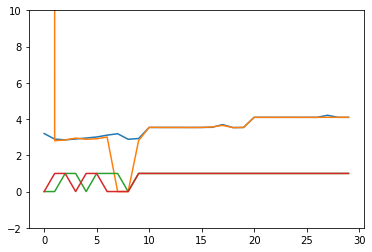

In [76]:
plt.plot(range(30), df.filter(like="sos")['length_sos'].values[:30],
df.filter(like="sos")['length_sos'].values[30:])
plt.ylim(-2, 10)

plt.plot( range(30), df.filter(like="sos")['valid_sos'].values[:30],
df.filter(like="sos")['valid_sos'].values[30:])
#plt.ylim(-1, 1)

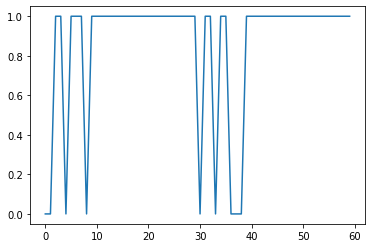

In [69]:
plt.plot( df.filter(like="sos")['valid_sos'])

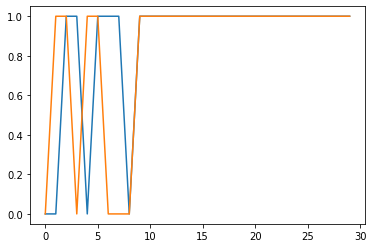

In [68]:
plt.plot( range(30), df.filter(like="sos")['valid_sos'].values[:30],
df.filter(like="sos")['valid_sos'].values[30:])
#plt.ylim(-1, 1)

0 sos
1 rrt
2 nlp


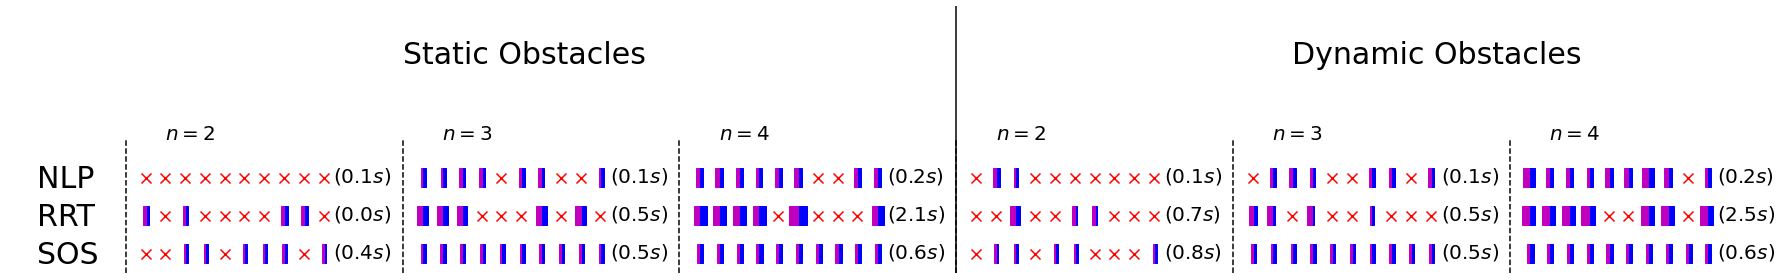

In [42]:
# Create figure and axes
fig,ax = plt.subplots(1, figsize=(25, 4))
plt.ylim(-.5, 6.5)

fig.patch.set_visible(False)
ax.axis('off')

RECT_HEIGHT = .5
def plot_rect(corner, length):
    corner = list(corner)
    c = 'b'
    if length < 0:
        length *= -1
        corner[0] -= length
        c = 'm'
        
    corner[1] -= RECT_HEIGHT / 2
    # Create a Rectangle patch
    rect = patches.Rectangle(corner, length, RECT_HEIGHT,
                             linewidth=1,
                             edgecolor=c,
                             facecolor=c)
    # Add the patch to the Axes
    ax.add_patch(rect)
    
def plot_cross(pos):
    plt.scatter([pos[0]], [pos[1]], s=100, marker='x', color='r')
    
keys = ('sos', 'rrt', 'nlp')
plt.yticks(np.arange(3), keys)
xoffset = -2

for row in df.iterrows():
    j, data = row
    # if n changes, 
    if j in np.where(df['n'].diff().abs() > 0)[0] or j == 0:
        x = j+xoffset
        c = 'k--'
        h = 3
        
        # draw vertical line
        plt.plot([x+3, x+3], [-3, h], c)
        # report n
        plt.annotate(f'$n={data.n}$', xy=(x+5, 3), size=20,)
        # report avgtime
        filt = (df.n == data.n) & (df.speed_obs == data.speed_obs)
        for ii, kk in enumerate(keys):
            t = df[filt]['time_'+kk].mean().round(1)
            plt.annotate(f'(${t}s)$', xy=(x+13.5, ii-.1), size=20,)
        
        
        xoffset += 4

    for i, k in enumerate(keys):
        add_tv = '_tv' if data.speed_obs > .1 and k == 'rrt' else ''
        if data['valid_'+k]:
            plot_rect((j+xoffset, i), data['length_'+k+add_tv]/20)
            plot_rect((j+xoffset, i), -data['smooth_'+k+add_tv]*2)
        else:
            plot_cross((j+xoffset, i))
            
plt.xlim(-5, j+xoffset+3)
            

# Static vs dynamic
plt.annotate('Static Obstacles', xy=(15, 5), size=30,)
plt.annotate('Dynamic Obstacles', xy=(60, 5), size=30,)
x = (j+xoffset+5)/2
plt.plot([x, x], [-3, 7], 'k-') 


# SOS NLP RRT
for j, k in enumerate(keys):
    print(j, k)
    plt.annotate(k.upper(), xy=(-3.5, j-.25), size=30,)

fig.tight_layout()
plt.savefig('comparison_sos_rrt_nlp.eps', format='eps', )

In [8]:
static = df[df.speed_obs == 0.]
filt = static.valid_sos & static.valid_rrt #& static.valid_nlp
static[filt].groupby("n").mean().filter(like="length")

,length_sos,length_rrt,length_rrt_tv,length_nlp
n,,,,
2,3.022877,3.544818,2.266265,2.869970
3,3.538554,5.742941,3.172674,3.429767
4,4.096372,7.670251,5.939901,3.985532


In [9]:
dynamic = df[df.speed_obs == 1.]
filt = dynamic.valid_sos & dynamic.valid_rrt_tv #& dynamic.valid_nlp
dynamic[filt].groupby("n").mean().filter(like="length")

,length_sos,length_rrt,length_rrt_tv,length_nlp
n,,,,
2,2.839011,1.584161,3.706234,3.100655
3,3.566676,5.288316,4.815811,3.441337


In [10]:
df.groupby(["speed_obs", "n"]).mean().filter(like="valid")

valid_sos  valid_rrt  valid_rrt_tv  valid_nlp
speed_obs n                                               
0.0       2        0.6        0.4           0.5        0.0
          3        1.0        0.5           0.4        0.7
          4        1.0        0.6           0.0        0.8
1.0       2        0.5        0.3           0.5        0.2
          3        1.0        0.4           0.4        0.6
          4        1.0        0.7           0.0        0.9

In [11]:
print(df.groupby(["speed_obs", "n"]).mean().filter(like="valid").to_csv())

speed_obs,n,valid_sos,valid_rrt,valid_rrt_tv,valid_nlp
0.0,2,0.6,0.4,0.5,0.0
0.0,3,1.0,0.5,0.4,0.7
0.0,4,1.0,0.6,0.0,0.8
1.0,2,0.5,0.3,0.5,0.2
1.0,3,1.0,0.4,0.4,0.6
1.0,4,1.0,0.7,0.0,0.9



In [12]:
df.groupby("n").mean().filter(like="length")

,length_sos,length_rrt,length_rrt_tv,length_nlp
n,,,,
2,500.033020,3.091955,3.032258,3.285225
3,3.553015,5.608271,3.617648,3.517259
4,4.102095,7.568320,6.012681,4.157315


In [13]:
df.groupby("n").agg({"valid_sos": lambda u: ''.join(map(str, map(int, u)))})

,valid_sos
n,
2,00110111010110110001
3,11111111111111111111
4,11111111111111111111


In [14]:
df.groupby("n").agg({"valid_rrt": lambda u: ''.join(map(str, map(int, u)))})

,valid_rrt
n,
2,10100001100010011000
3,11100010101101001000
4,11110100011111001101


# To latex

In [54]:
static_df = df[df.speed_obs==0].round(2)
for key in ('rrt', 'sos', 'nlp', 'rrt_tv'):
    for metric in ('length', 'smooth', 'time'):
        static_df[metric+'_'+key][~static_df['valid_'+key]] = -1234

        

/home/bachir/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [154]:
for n  in (2, 3, 4):

    for key in ('rrt', 'nlp', 'sos'):
        for dyn in (0, 1):
            if key == 'rrt' and dyn==0:
                print(r"\multirow{3}{*}{$%d$} &" % n, end='')
            else:
                print(r"{} &", end='')
            if dyn == 0:
                print(names_dict[key], "&", end='')
            dyn_df = df[(df.speed_obs==dyn) & (df.n == n)]
            key2 = key
            if key == 'rrt' and dyn == 1:
                key2 = 'rrt_tv'
            if key == 'sos':
                hl = lambda s: "\\HL{%s}" % s
            else:
                hl = lambda s: s
            #print(n, dyn, key2, 'pct', dyn_df['valid_'+key].mean())
            
            print(hl((dyn_df['valid_'+key2].mean() * 100).round(0) ), r'\% &', end = '')
            for metric in ('length', 'smooth', 'time'):
                print( hl(np.round(dyn_df[metric+'_'+key2][dyn_df['valid_'+key2]].mean(), 2)), end = '')
                if metric != 'time':
                    print('&', end = '')
        print(r"\\")
    print(r"\hline")

\multirow{3}{*}{$2$} &RRT &40.0 \% &3.73&0.06&0.02{} &50.0 \% &3.59&0.12&0.06\\
{} &NLP &0.0 \% &nan&nan&nan{} &20.0 \% &3.4&0.06&0.06\\
{} &\HL{MMP} &\HL{60.0} \% &\HL{3.0}&\HL{0.03}&\HL{0.43}{} &\HL{50.0} \% &\HL{2.85}&\HL{0.03}&\HL{0.43}\\
\hline
\multirow{3}{*}{$3$} &RRT &50.0 \% &5.74&0.13&0.12{} &40.0 \% &4.82&0.1&0.23\\
{} &NLP &70.0 \% &3.44&0.05&0.12{} &60.0 \% &3.48&0.06&0.17\\
{} &\HL{MMP} &\HL{100.0} \% &\HL{3.55}&\HL{0.04}&\HL{0.47}{} &\HL{100.0} \% &\HL{3.55}&\HL{0.04}&\HL{0.47}\\
\hline
\multirow{3}{*}{$4$} &RRT &60.0 \% &7.67&0.15&1.43{} &0.0 \% &nan&nan&nan\\
{} &NLP &80.0 \% &3.99&0.08&0.25{} &90.0 \% &4.34&0.1&0.2\\
{} &\HL{MMP} &\HL{100.0} \% &\HL{4.11}&\HL{0.05}&\HL{0.55}{} &\HL{100.0} \% &\HL{4.1}&\HL{0.05}&\HL{0.55}\\
\hline


In [151]:
names_dict = {'rrt': 'RRT', 'nlp': 'NLP', 'sos': '\\HL{MMP}'}

In [140]:
(df[(df.speed_obs==1) & (df.n == 4)]['valid_rrt_tv'].mean() * 100).round(2)

0.0